In [1]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in analysis data
cleaned_df = pd.read_csv("foo.csv")
cleaned_df = cleaned_df.drop(["Unnamed: 0"],axis=1)

In [3]:
grouped_df = cleaned_df.groupby(["country","Restrictions"]).mean()
print(grouped_df.head(5))

                        week       NO2      PM2.5  Week of Restrictions  \
country   Restrictions                                                    
Argentina No             6.0  6.424441  36.385823                  12.0   
          Yes           12.5  3.777778  29.769048                  12.0   
Australia No             6.5  5.667712  29.802374                  13.0   
          Yes           13.0  5.237778  24.563333                  13.0   
Bolivia   No             6.5  8.306250  33.015972                  13.0   

                        Restriction Week Counter  
country   Restrictions                            
Argentina No                                 NaN  
          Yes                                1.5  
Australia No                                 NaN  
          Yes                                1.0  
Bolivia   No                                 NaN  


In [4]:
nice_df = pd.DataFrame(grouped_df[["NO2","PM2.5"]])

In [5]:
nice_df = nice_df.reset_index()

In [6]:
nice_df.head(50)

,country,Restrictions,NO2,PM2.5
0,Argentina,No,6.424441,36.385823
1,Argentina,Yes,3.777778,29.769048
2,Australia,No,5.667712,29.802374
3,Australia,Yes,5.237778,24.563333
4,Bolivia,No,8.306250,33.015972
5,Bolivia,Yes,5.000000,32.450000
6,Brazil,No,13.642695,53.673160
7,Brazil,Yes,13.211310,44.792262
8,Canada,No,11.664831,28.667101
9,Canada,Yes,8.712500,30.016667


<IPython.core.display.Javascript object>


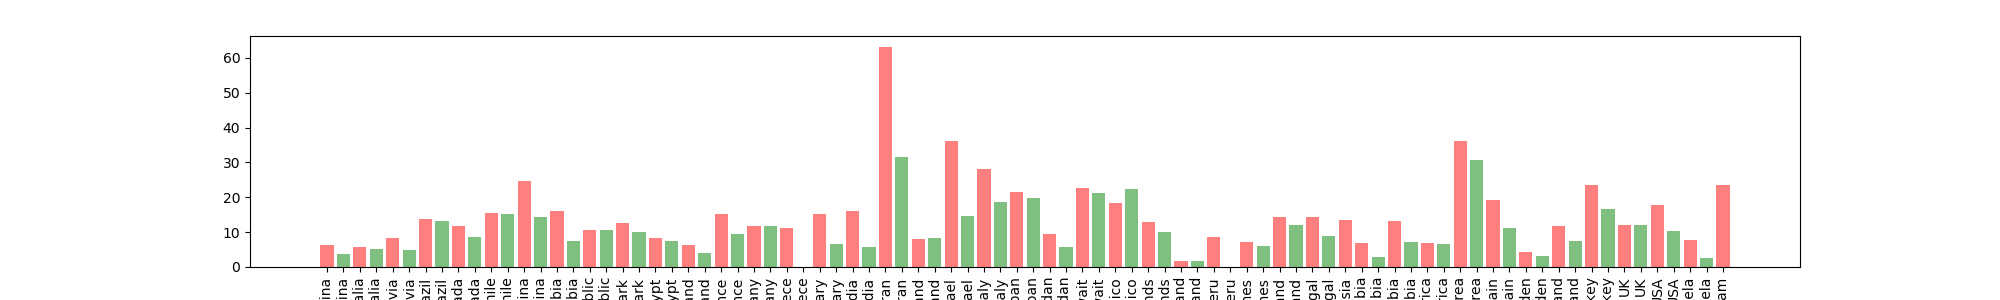

([<matplotlib.axis.XTick at 0x1aa068b3548>,
 <a list of 86 Text xticklabel objects>)

In [10]:
x_axis = np.arange(len(nice_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, nice_df["NO2"], color=np.where(nice_df["Restrictions"] =='No', 'r', 'g'), alpha=0.5, align="edge")
plt.xticks(tick_locations, nice_df["country"], rotation="vertical")

<IPython.core.display.Javascript object>


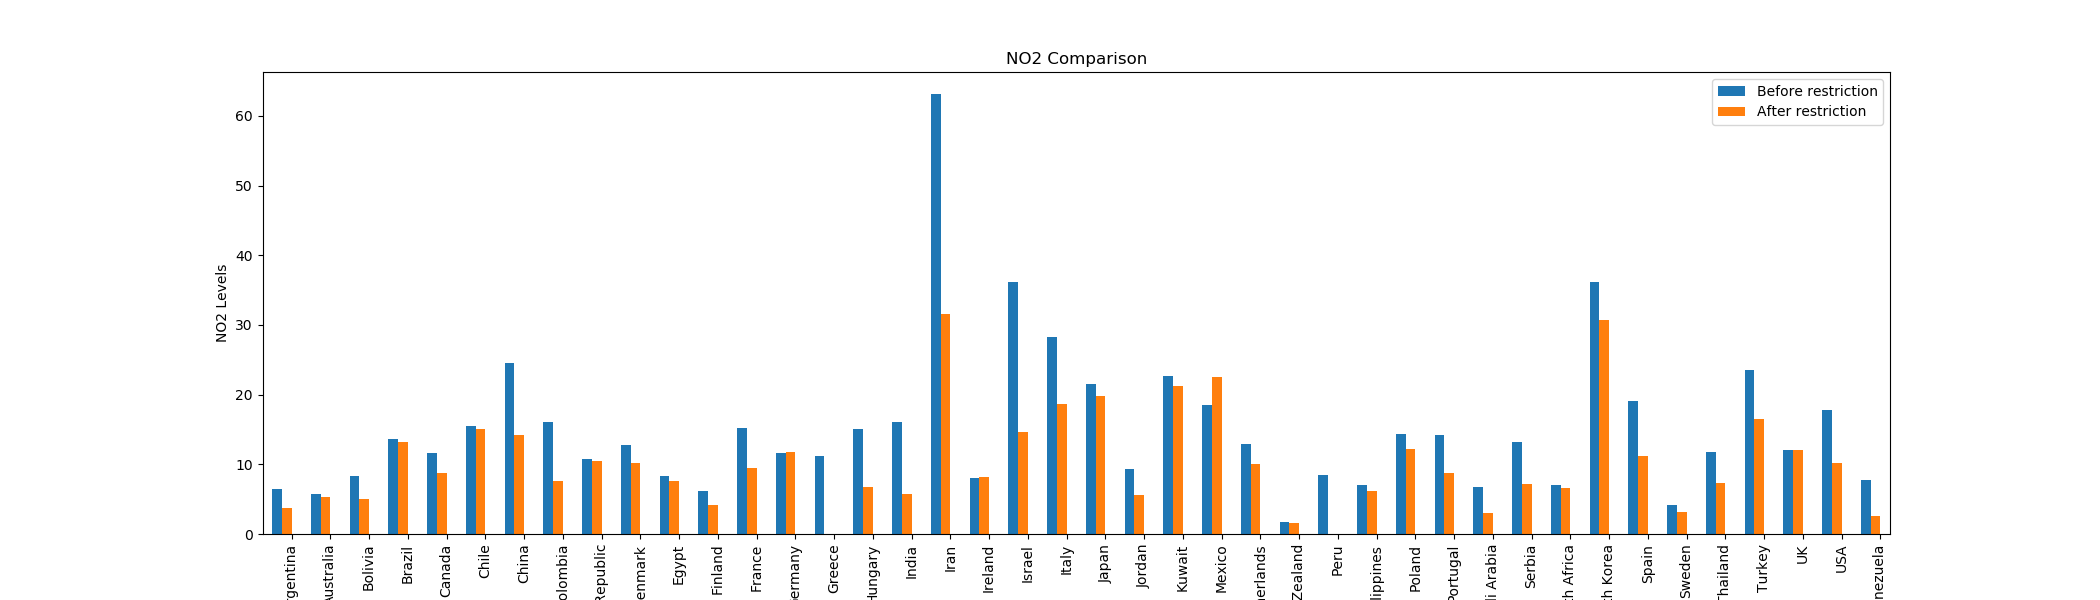

Text(0, 0.5, 'NO2 Levels')

In [82]:
no_restriction_df = nice_df.loc[nice_df['Restrictions'] == 'No']
no_restriction_set = no_restriction_df["NO2"]
restriction_df = nice_df.loc[nice_df['Restrictions'] == 'Yes']
restriction_set = restriction_df["NO2"]



df = pd.DataFrame({'Country' :no_restriction_df["country"],
                    'Before restriction':no_restriction_df["NO2"] })

df1 = pd.DataFrame({'Country' :restriction_df["country"],
                    'After restriction':restriction_df["NO2"] })

merged_df = pd.merge(df, df1, on='Country')

merged_df.set_index('Country', inplace = True)

ax = merged_df.plot(kind= 'bar', figsize=(len(merged_df)/2, 6), title = "NO2 Comparison",position= 1 )

ax.set_xlabel("Countries")
ax.set_ylabel("NO2 Levels")

